# 1. Import Libraries

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import keras
import tensorflow as tf

print('Keras version: ', keras.__version__)
print('Tensorflow version: ', tf.__version__)

Keras version:  2.8.0
Tensorflow version:  2.8.0


In [3]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import img_to_array, load_img

import warnings
warnings.filterwarnings('ignore')

In [4]:
from keras.callbacks import TensorBoard

# 2. Loading Dataset
## 2.1 Define Dataset

In [5]:
from keras.utils.np_utils import to_categorical
from sklearn.datasets import fetch_lfw_people

# Load the dataset
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# Introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape



## 2.2 Defining Predictor and Target

In [6]:
# for machine learning we use the 2 data directly ( as relative pixel)
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
n_observations = X.shape[0]

# the label to predict is the id of the person
y = lfw_people.target

y = to_categorical(
    y,
    num_classes = len(set(y)),
    dtype = 'uint8'
)






## 2.3 Get Target Names

In [7]:
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('Target Names:\n', target_names)
print('Classes: ', n_classes)

Target Names:
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Classes:  7


## 2.4 Print the dataset size

In [8]:

print('Total dataset size:')
print('n_samples: %d' % n_samples)
print('n_features: %d' % n_features)
print('n_classes: %d' % n_classes)
print('Height: %d' % h)
print('Width: %d' % w)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Height: 50
Width: 37


# 3. Splitting the Data

In [9]:
from sklearn.model_selection import train_test_split
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42,
)
X_train_whole, X_test_whole = X_train_whole / 255.0, X_test_whole / 255.0
train_size = 966
test_size = 322
X_train_whole_r = X_train_whole.reshape(train_size, h, w, 1)
X_test_whole_r = X_test_whole.reshape(test_size, h, w, 1)

print('X_train shape ', X_train_whole_r.shape)
print('X_test shape', X_test_whole_r.shape)
print('y_train shape ', y_train_whole.shape)
print('y_test shape ', y_test_whole.shape)

X_train shape  (966, 50, 37, 1)
X_test shape (322, 50, 37, 1)
y_train shape  (966, 7)
y_test shape  (322, 7)


In [10]:
X_train = X_train_whole_r[:train_size, 74:298, : , :]
y_train = y_train_whole[0:train_size]
X_test = X_test_whole_r[0:test_size, 74:298, :, :]
y_test = y_test_whole[0:test_size]

# 4. Check Data

In [11]:
def plot_gallery_title(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize = (1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
        
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Predicted %s\nTrue     %s' % (pred_name, true_name)


def label_proportion(x, decimals = 2):
    unique, counts = np.unique(x, return_counts = True)
    return dict(zip(unique, np.round(counts / len(x), decimals)))

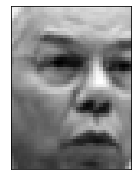

In [12]:
id = np.random.randint(len(lfw_people.target))
plt.figure(figsize = (3, 3))
plt.imshow(lfw_people.images[id], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
def plot_gallery(images, titles, h, w, n_row = 5, n_col = 4):
    plt.figure(figsize = (1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

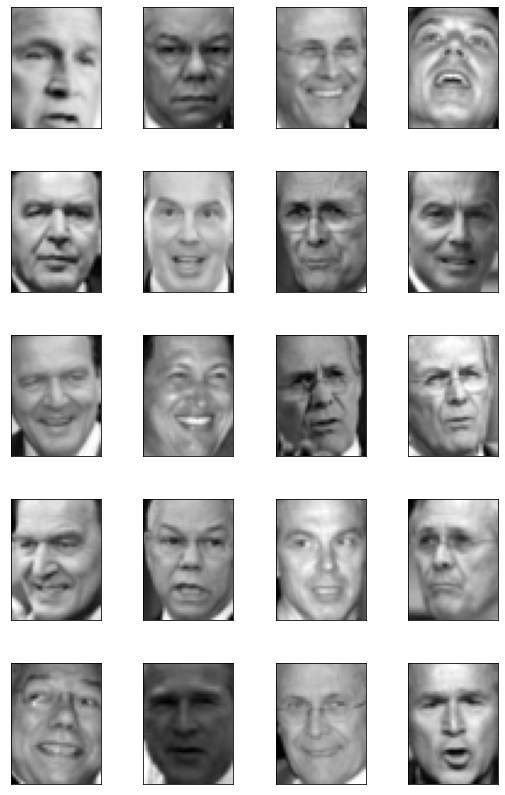

In [14]:
# Original Height and width (Rectangular Shape)

plot_gallery(X_train_whole_r, y_train, h, w)

# 6. Alexnet

## 6.1 Import Libraries

In [15]:
import pandas as pd
import numpy as np
from collections import Counter
# import cv2

## 6.1 Load the data

In [16]:
# lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 6.69)
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 2.39)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# y = to_categorical(
#     y,
#     num_classes = len(set(y)),
#     dtype = 'uint8'
# )


print('Total Dataset size:')
print('n_samples: %d' % n_samples)
print('n_features: %d' % n_features)
print('height: %d' % h)
print('width: %d' % w)
print('n_classes: %d' % n_classes)
print()

Total Dataset size:
n_samples: 1288
n_features: 66752
height: 298
width: 224
n_classes: 7



##  6.2 Split the Data

In [17]:
from sklearn.model_selection import train_test_split
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42,
)
X_train_whole, X_test_whole = X_train_whole / 255.0, X_test_whole / 255.0
train_size = 966
test_size = 322
X_train_whole_r = X_train_whole.reshape(train_size, h, w, 1)
X_test_whole_r = X_test_whole.reshape(test_size, h, w, 1)

X_train = X_train_whole_r[:, 74:298, : , :]
y_train = y_train_whole[:]
X_test = X_test_whole_r[:, 74:298, :, :]
y_test = y_test_whole[:]

print('y_train Count:',Counter(list(y_train)))
print('y_test Count:',Counter(list(y_test)))

y_train = to_categorical(
    y_train,
    num_classes = len(set(y_train)),
    dtype = 'uint8'
)

y_test = to_categorical(
    y_test,
    num_classes = len(set(y)),
    dtype = 'uint8'
)

print('X_train shape ', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape ', y_train.shape)
print('y_test shape ', y_test.shape)


y_train Count: Counter({3: 384, 1: 176, 6: 108, 2: 94, 4: 84, 0: 64, 5: 56})
y_test Count: Counter({3: 146, 1: 60, 6: 36, 2: 27, 4: 25, 5: 15, 0: 13})
X_train shape  (966, 224, 224, 1)
X_test shape (322, 224, 224, 1)
y_train shape  (966, 7)
y_test shape  (322, 7)


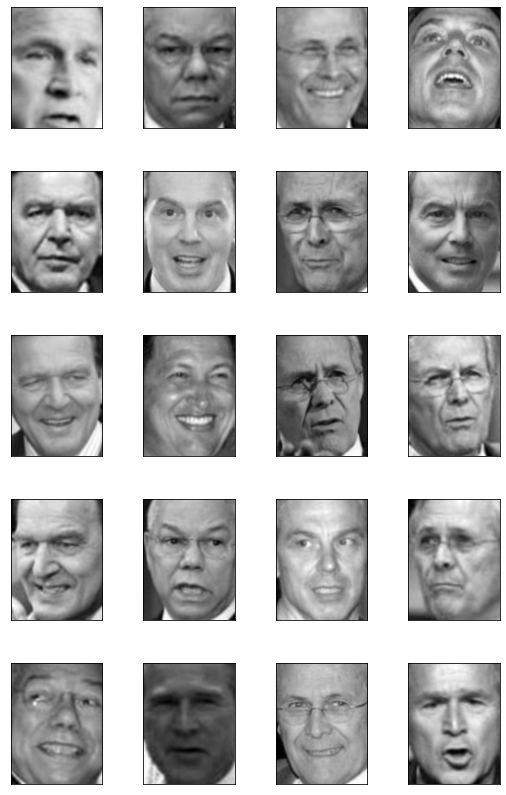

In [18]:
# Original Shape 
plot_gallery(X_train_whole_r, y_train, h, w)

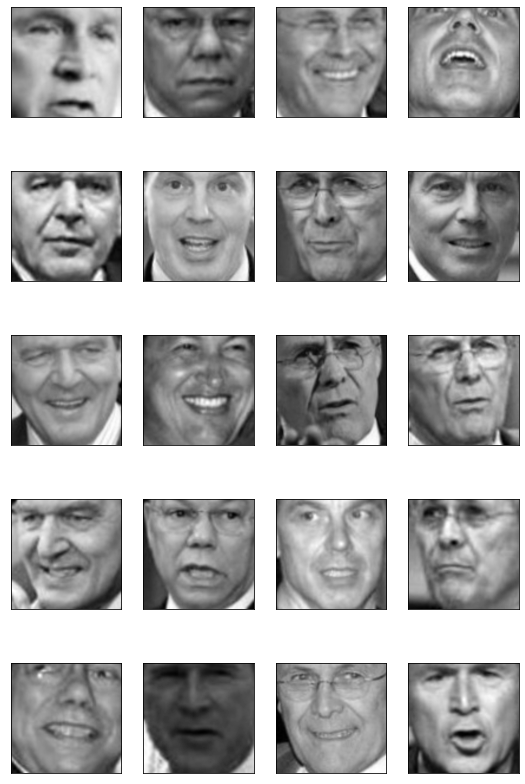

In [19]:
# Shape after Cropping (Rectangualr shape)
plot_gallery(X_train, y_train, 224,224)

## 6.3 Tools and Library

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16 as vgg16
from tensorflow.keras.applications.vgg19 import VGG19 as vgg19
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

## 6.4 Implementing CNN Model

In [21]:
# Implementing with Keras

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [22]:
model = Sequential()


# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (224, 224, 1),
                kernel_size = (11, 11), strides = (4, 4),
                padding = 'valid'))
model.add(Activation('relu'))

#Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
                      strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
                strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
                strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())

# 4th Convolutional Lauer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
                strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
                strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
                      padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Flattening
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape = (224*224*1, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisatoin
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# output softmax layer
model.add(Dense(7))
model.add(Activation('softmax'))

In [23]:
# Define the optimzer
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tf.optimizers.SGD(lr = 0.001), 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        11712     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

## 6.5 Fit the model

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 100
batch_size = 22
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 20, verbose =0, mode ='auto')

In [25]:
%%time

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = 100, validation_data = (X_test, y_test), steps_per_epoch =  X_train.shape[0] // batch_size, validation_freq = 1, verbose = 0, callbacks = [early])

print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Training accuracy:1.00 validation accuracy:0.81 
Wall time: 55min 25s


## 6.6 Evaluate the model

In [26]:
%%time
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

Wall time: 3.38 s


In [27]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
                print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [28]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6 
---------------------------------
  0|   8   1   3   1   0   0   0 
  1|   1  56   0   2   0   0   1 
  2|   0   0  19   3   3   1   1 
  3|   0   2   2 130   7   2   3 
  4|   2   1   1   5  14   0   2 
  5|   1   1   0   4   0   9   0 
  6|   0   1   2   5   2   2  24 


Text(0.5, 1.0, 'Confusion Matrix')

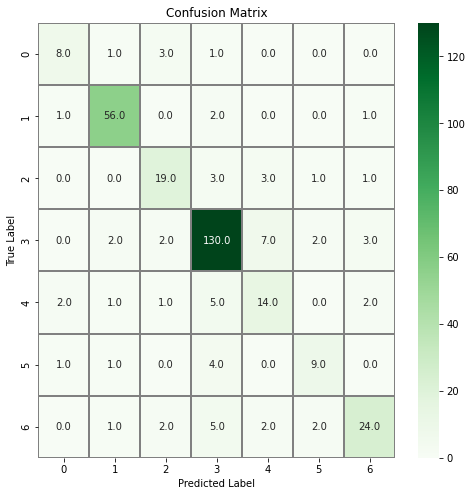

In [29]:
import seaborn as sns
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(cm, annot = True, linewidths = 0.01, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', ax = ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

## 6.7 Visualisation of Cost

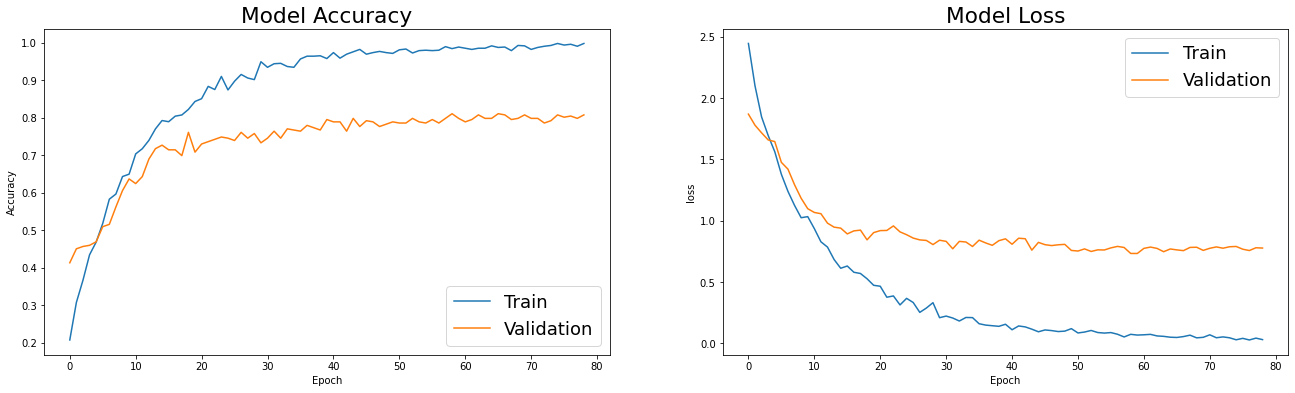

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size' : 18})


# plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()


## 6.8 Results

In [31]:
def plot_gallery_title(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize = (1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

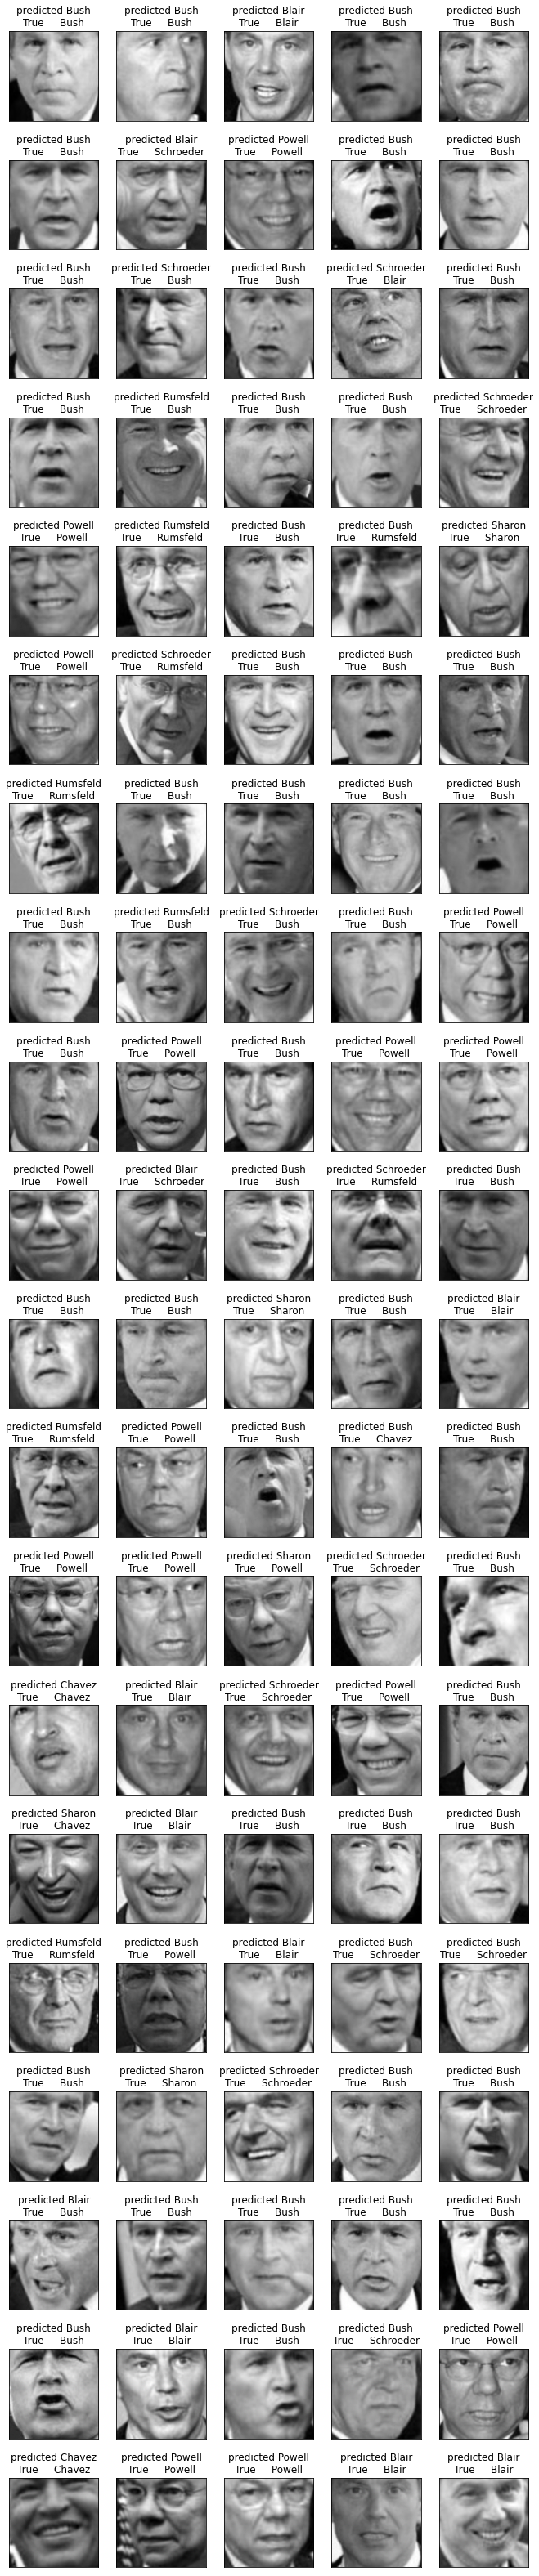

In [32]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted %s\nTrue     %s' % (pred_name, true_name)


prediction_titles = [
    title(predictions, y_test_target, target_names, i) for i in range(predictions.shape[0])
]

plot_gallery_title(X_test, prediction_titles,224, 224, n_row = 20, n_col = 5)

# 7. Resnet v1

## 7.1 Import Libraries

In [33]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Input, Add, add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

## 7.2 Setting Training Hyperparameters

In [34]:
batch_size = 32
epochs = 100
data_augmentation = False
num_classes = 7

# Data Preprocessing
subtract_pixel_mean = True
n = 3

# Select ResNet Version
version = 1

# Computed Depth of
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2
    
# Model name, depth and version
model_type = 'ResNet % dv % d' % (depth, version)
print('Model Type ', model_type  )

Model Type  ResNet  20v  1


## 7.3 Load the Data

In [35]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 2.39)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('Total Dataset size:')
print('n_samples: %d' %n_samples)
print('n_features: %d'%n_features)
print('height: %d' %h)
print('width: %d' %w)
print('n_classes: %d' %n_classes)

Total Dataset size:
n_samples: 1288
n_features: 66752
height: 298
width: 224
n_classes: 7


## 7.4 Splitting the Data

In [36]:
from sklearn.model_selection import train_test_split
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42,
)
X_train_whole, X_test_whole = X_train_whole / 255.0, X_test_whole / 255.0
train_size = 966
test_size = 322
X_train_whole_r = X_train_whole.reshape(train_size, h, w, 1)
X_test_whole_r = X_test_whole.reshape(test_size, h, w, 1)

X_train = X_train_whole_r[:, 74:298, : , :]
y_train = y_train_whole[:]
X_test = X_test_whole_r[:, 74:298, :, :]
y_test = y_test_whole[:]

print('y_train Count:',Counter(list(y_train)))
print('y_test Count:',Counter(list(y_test)))



print('X_train shape ', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape ', y_train.shape)
print('y_test shape ', y_test.shape)


# If subtract pixel mean is enabled

if subtract_pixel_mean:
    X_train_mean = np.mean(X_train, axis = 0)
    X_train -= X_train_mean
    X_test -= X_train_mean
    
# Print Training and Test Samples
print('\nTraining and Test Samples')
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('y_train shape: ', y_train.shape)

y_train = to_categorical(
    y_train,
    num_classes = len(set(y_train)),
    dtype = 'uint8'
)

y_test = to_categorical(
    y_test,
    num_classes = len(set(y)),
    dtype = 'uint8'
)

y_train Count: Counter({3: 384, 1: 176, 6: 108, 2: 94, 4: 84, 0: 64, 5: 56})
y_test Count: Counter({3: 146, 1: 60, 6: 36, 2: 27, 4: 25, 5: 15, 0: 13})
X_train shape  (966, 224, 224, 1)
X_test shape (322, 224, 224, 1)
y_train shape  (966,)
y_test shape  (322,)

Training and Test Samples
X_train shape:  (966, 224, 224, 1)
966 train samples
322 test samples
y_train shape:  (966,)


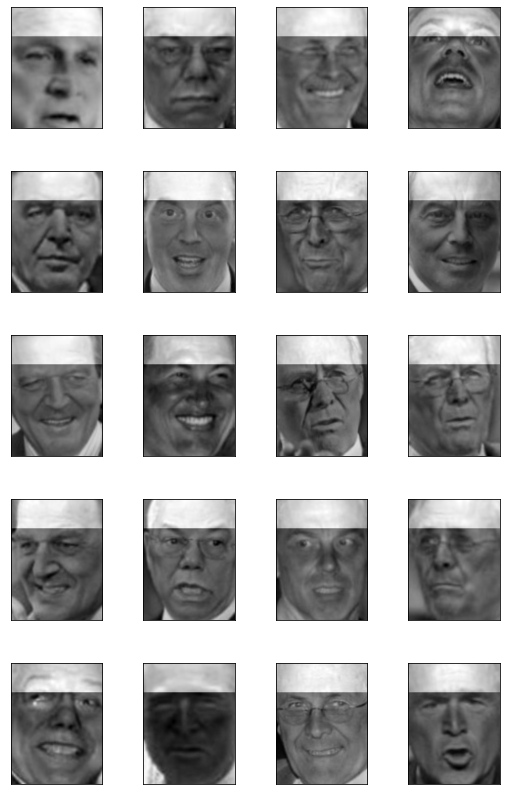

In [37]:
# Original Shape 
plot_gallery(X_train_whole_r, y_train, h, w)

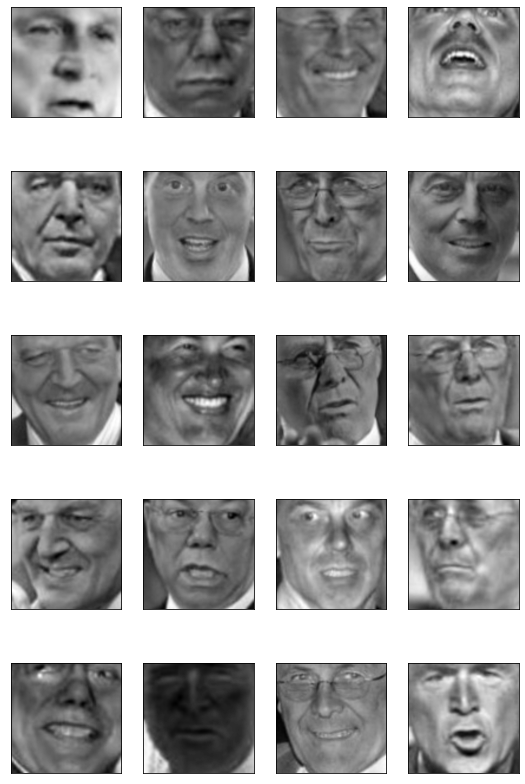

In [38]:
# Shape after Cropping (Rectangualr shape)
plot_gallery(X_train, y_train, 224,224)

## 7.5 Defining Resnet Function

In [39]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [40]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [41]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [42]:
model = ResNet50(input_shape = (224, 224, 1))

In [43]:
headModel = model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 7,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [44]:
model = Model(inputs=model.input, outputs=headModel)

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  3200        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

                                                                                                  
 activation_17 (Activation)     (None, 55, 55, 64)   0           ['bn2c_branch2b[0][0]']          
                                                                                                  
 res2c_branch2c (Conv2D)        (None, 55, 55, 256)  16640       ['activation_17[0][0]']          
                                                                                                  
 bn2c_branch2c (BatchNormalizat  (None, 55, 55, 256)  1024       ['res2c_branch2c[0][0]']         
 ion)                                                                                             
                                                                                                  
 add_2 (Add)                    (None, 55, 55, 256)  0           ['bn2c_branch2c[0][0]',          
                                                                  'activation_15[0][0]']          
          

 ion)                                                                                             
                                                                                                  
 add_5 (Add)                    (None, 28, 28, 512)  0           ['bn3c_branch2c[0][0]',          
                                                                  'activation_24[0][0]']          
                                                                                                  
 activation_27 (Activation)     (None, 28, 28, 512)  0           ['add_5[0][0]']                  
                                                                                                  
 res3d_branch2a (Conv2D)        (None, 28, 28, 128)  65664       ['activation_27[0][0]']          
                                                                                                  
 bn3d_branch2a (BatchNormalizat  (None, 28, 28, 128)  512        ['res3d_branch2a[0][0]']         
 ion)     

 add_8 (Add)                    (None, 14, 14, 1024  0           ['bn4b_branch2c[0][0]',          
                                )                                 'activation_33[0][0]']          
                                                                                                  
 activation_36 (Activation)     (None, 14, 14, 1024  0           ['add_8[0][0]']                  
                                )                                                                 
                                                                                                  
 res4c_branch2a (Conv2D)        (None, 14, 14, 256)  262400      ['activation_36[0][0]']          
                                                                                                  
 bn4c_branch2a (BatchNormalizat  (None, 14, 14, 256)  1024       ['res4c_branch2a[0][0]']         
 ion)                                                                                             
          

                                                                                                  
 res4f_branch2a (Conv2D)        (None, 14, 14, 256)  262400      ['activation_45[0][0]']          
                                                                                                  
 bn4f_branch2a (BatchNormalizat  (None, 14, 14, 256)  1024       ['res4f_branch2a[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_46 (Activation)     (None, 14, 14, 256)  0           ['bn4f_branch2a[0][0]']          
                                                                                                  
 res4f_branch2b (Conv2D)        (None, 14, 14, 256)  590080      ['activation_46[0][0]']          
                                                                                                  
 bn4f_bran

 ion)                                                                                             
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 512)    0           ['bn5c_branch2a[0][0]']          
                                                                                                  
 res5c_branch2b (Conv2D)        (None, 7, 7, 512)    2359808     ['activation_55[0][0]']          
                                                                                                  
 bn5c_branch2b (BatchNormalizat  (None, 7, 7, 512)   2048        ['res5c_branch2b[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_56 (Activation)     (None, 7, 7, 512)    0           ['bn5c_branch2b[0][0]']          
          

# 7.6 Fitting the Model

In [46]:
opt = SGD(lr = 1e-4, momentum = 0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [47]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 20, verbose =0, mode ='auto')

In [48]:
%%time
history = model.fit(x = X_train, y = y_train,
                    batch_size = batch_size ,
                    epochs = 100,
                    validation_data = (X_test, y_test), 
                    steps_per_epoch = X_train.shape[0] // batch_size,
                    validation_freq = 1, 
                    verbose = 0,
                    callbacks = [early])
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')


Training accuracy:1.00 validation accuracy:0.59 
Wall time: 5h 2min 42s


## 7.7 Evaluate the Model

In [49]:
%%time
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

Wall time: 14.8 s


In [50]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
                print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [51]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6 
---------------------------------
  0|   3   3   1   3   2   0   1 
  1|   2  37   3  11   5   0   2 
  2|   0   8   5   8   1   0   5 
  3|   1   9   8 119   2   3   4 
  4|   1   4   2   7   9   0   2 
  5|   0   7   0   4   2   1   1 
  6|   1   1   0  13   4   1  16 


Text(0.5, 1.0, 'Confusion Matrix')

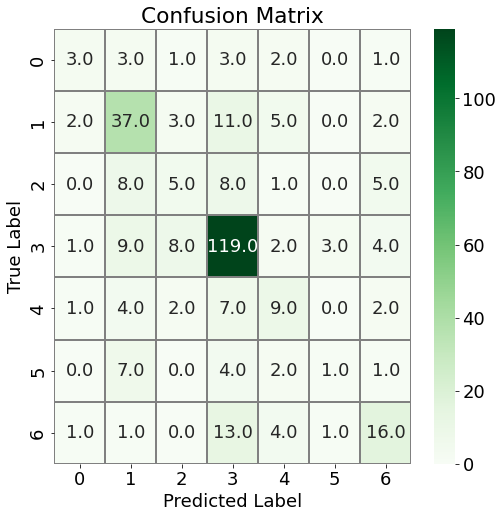

In [52]:
import seaborn as sns
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(cm, annot = True, linewidths = 0.01, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', ax = ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

## 7.8 Visualisation of Score & Accuracy

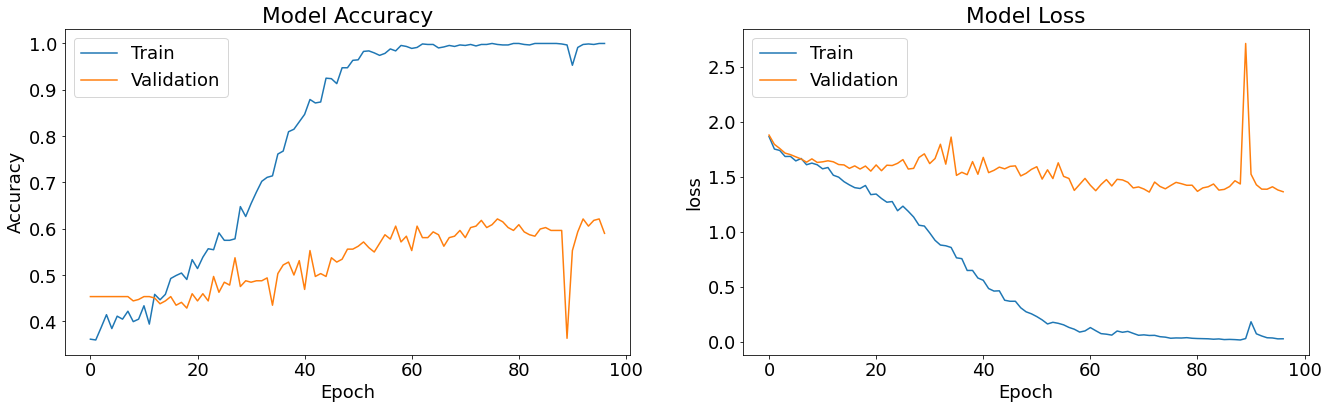

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size' : 18})


# plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## 7.9 Results

In [54]:
def plot_gallery_title(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize = (1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

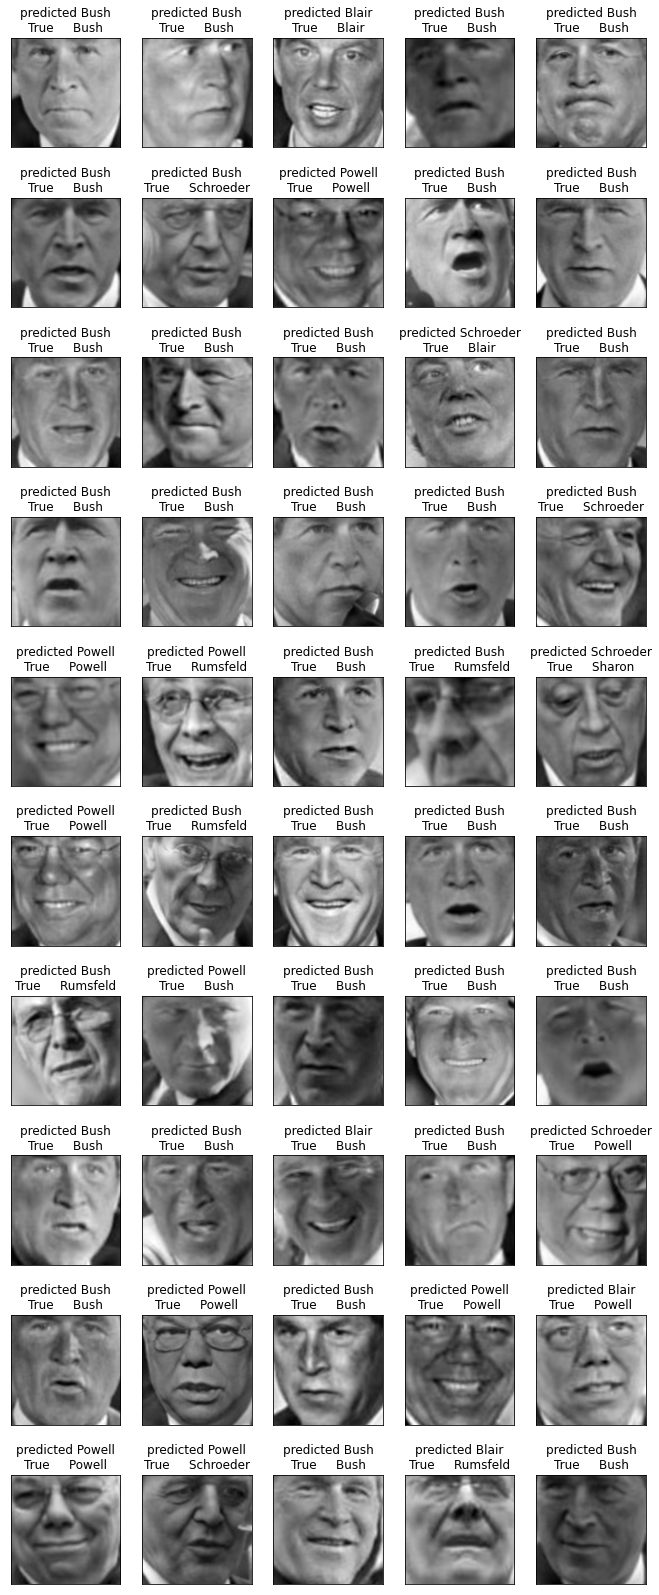

In [55]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted %s\nTrue     %s' % (pred_name, true_name)


prediction_titles = [
    title(predictions, y_test_target, target_names, i) for i in range(predictions.shape[0])
]

plot_gallery_title(X_test, prediction_titles,224, 224, n_row = 10, n_col = 5)

# 8. VGG16

## 8.1 Import Libraries

In [56]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Input, Add, add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

## 8.2 Load the Data

In [57]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 2.39)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('Total Dataset size:')
print('n_samples: %d' %n_samples)
print('n_features: %d'%n_features)
print('height: %d' %h)
print('width: %d' %w)
print('n_classes: %d' %n_classes)

Total Dataset size:
n_samples: 1288
n_features: 66752
height: 298
width: 224
n_classes: 7


## 8.3 Split the Data

In [58]:
from sklearn.model_selection import train_test_split
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42,
)
X_train_whole, X_test_whole = X_train_whole / 255.0, X_test_whole / 255.0
train_size = 966
test_size = 322
X_train_whole_r = X_train_whole.reshape(train_size, h, w, 1)
X_test_whole_r = X_test_whole.reshape(test_size, h, w, 1)

X_train = X_train_whole_r[:, 74:298, : , :]
y_train = y_train_whole[:]
X_test = X_test_whole_r[:, 74:298, :, :]
y_test = y_test_whole[:]

print('y_train Count:',Counter(list(y_train)))
print('y_test Count:',Counter(list(y_test)))

y_train = to_categorical(
    y_train,
    num_classes = len(set(y_train)),
    dtype = 'uint8'
)

y_test = to_categorical(
    y_test,
    num_classes = len(set(y)),
    dtype = 'uint8'
)

print('X_train shape ', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape ', y_train.shape)
print('y_test shape ', y_test.shape)

y_train Count: Counter({3: 384, 1: 176, 6: 108, 2: 94, 4: 84, 0: 64, 5: 56})
y_test Count: Counter({3: 146, 1: 60, 6: 36, 2: 27, 4: 25, 5: 15, 0: 13})
X_train shape  (966, 224, 224, 1)
X_test shape (322, 224, 224, 1)
y_train shape  (966, 7)
y_test shape  (322, 7)


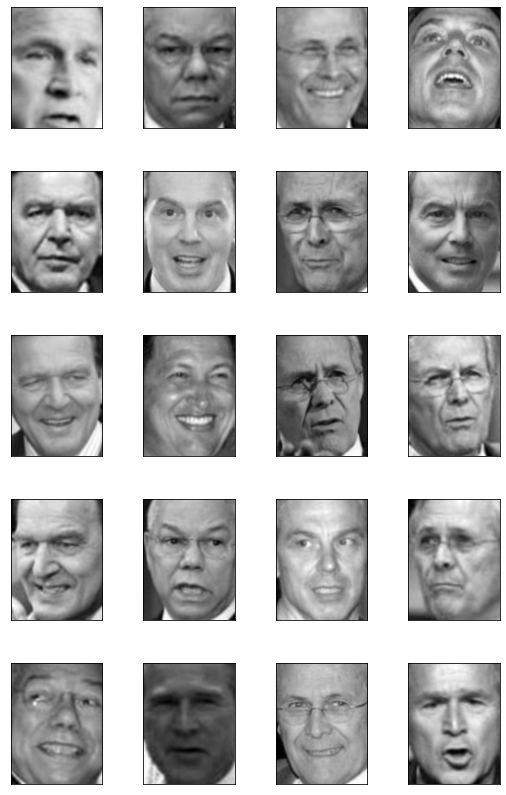

In [59]:
# Original Shape (Rectangular Shape)
plot_gallery(X_train_whole_r, y_train, h, w)

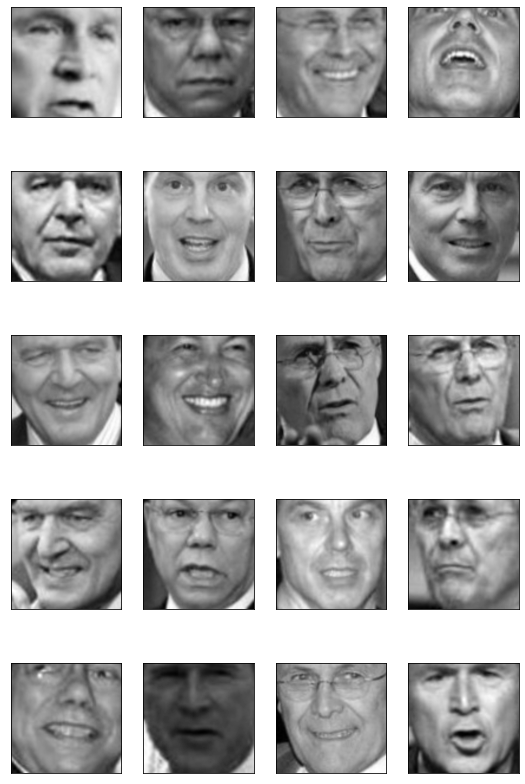

In [60]:
# After Cropping Shape (Square Shape)
plot_gallery(X_train, y_train, 224, 224)

## 8.4 CNN Model

In [61]:
from tensorflow.keras.optimizers import Adam
opt = Adam()

model = Sequential()

# Block 1
model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Block 4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


# Block 5

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))

# Classification Block
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation="softmax"))

model.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      640       
                                                                 
 batch_normalization_7 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 224, 224, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)    

## 8.6 Fit the Model

In [62]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 20, verbose =0, mode ='auto')

In [63]:
%%time
history = model.fit(x = X_train, y = y_train,
                    batch_size = batch_size ,
                    epochs = 100,
                    validation_data = (X_test, y_test), 
                    steps_per_epoch = X_train.shape[0] // batch_size,
                    validation_freq = 1, 
                    verbose = 0,
                    callbacks = [early])
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')


Training accuracy:0.96 validation accuracy:0.32 
Wall time: 8h 24min 28s


## 8.7 Evaluate the Model

In [64]:
%%time
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

Wall time: 31.5 s


In [65]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
                print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [66]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

  |  0  1  2  3  4  5  6 
-------------------------
 0|  7  5  0  0  0  0  1 
 1|  7 53  0  0  0  0  0 
 2|  1 11 10  0  2  0  3 
 3| 79 24  1 13  3  2 24 
 4|  7  8  0  0  8  0  2 
 5|  8  6  0  0  0  1  0 
 6| 18  6  0  0  1  0 11 


Text(0.5, 1.0, 'Confusion Matrix')

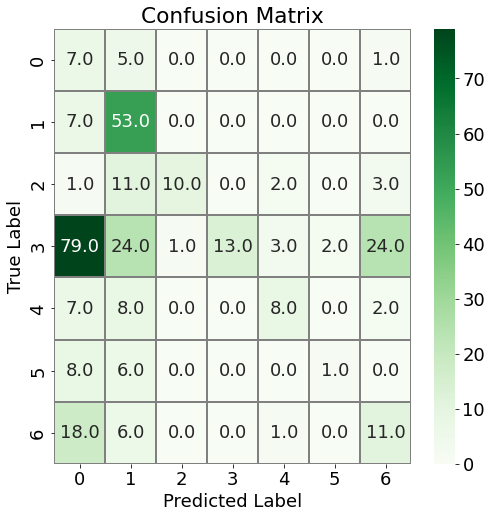

In [67]:
import seaborn as sns
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(cm, annot = True, linewidths = 0.01, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', ax = ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

## 8.8 Visualisation of Results

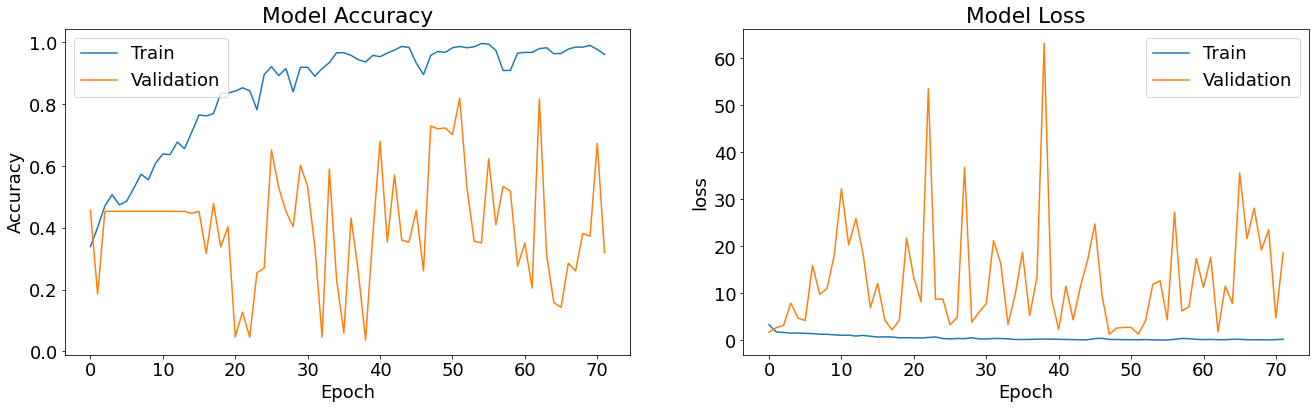

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size' : 18})


# plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## 8.9 Results

In [69]:
def plot_gallery_title(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize = (1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

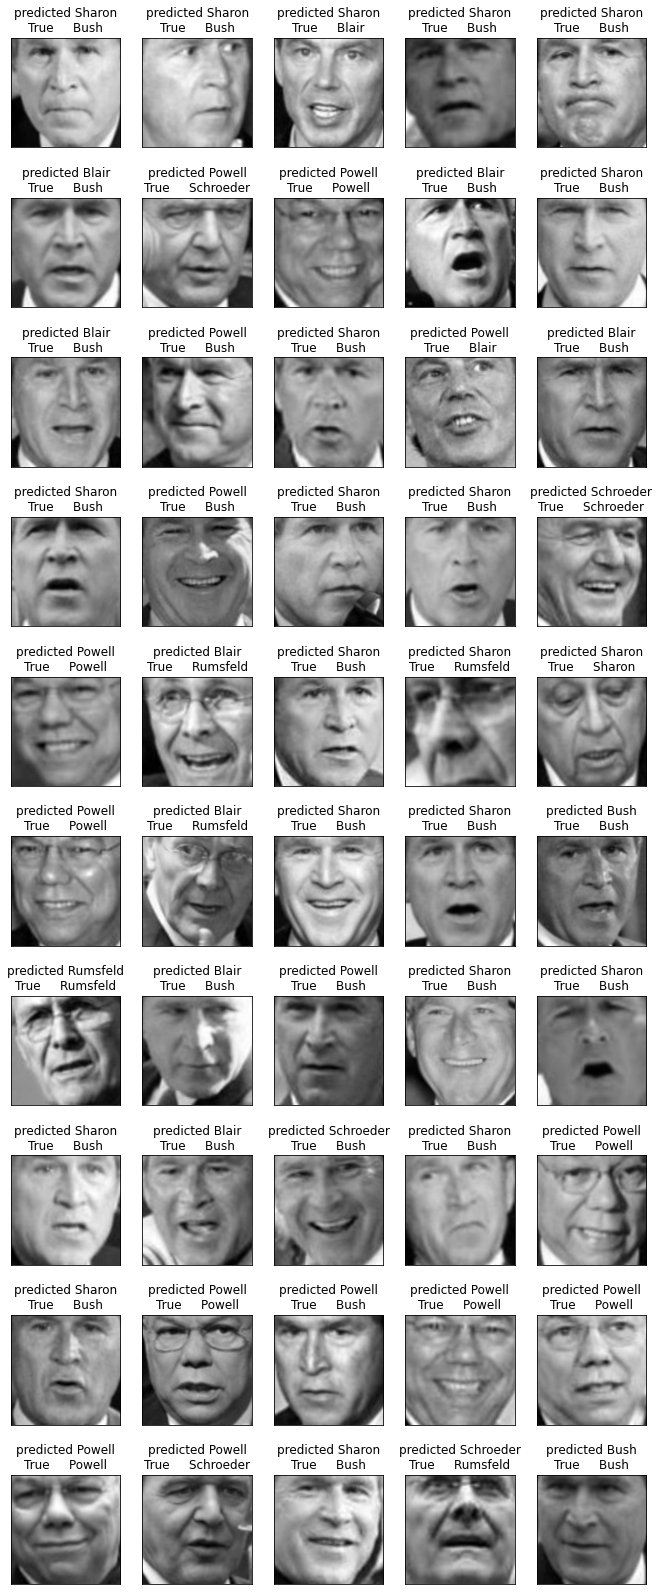

In [70]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted %s\nTrue     %s' % (pred_name, true_name)


prediction_titles = [
    title(predictions, y_test_target, target_names, i) for i in range(predictions.shape[0])
]

plot_gallery_title(X_test, prediction_titles,224, 224, n_row = 10, n_col = 5)